### 민원 빅데이터 OPEN API 활용

In [19]:
import pandas as pd
householdes= pd.read_csv('C:/Users/dlagh/Desktop/서울시1인가구_시군구별.csv')
householdes.head(2)

,Unnamed: 0,행정구역별(시군구),성별,2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,...,2019.6,2019.7,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7
0,0,행정구역별(시군구),성별,1인가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대주택,주택_비거주용건물내 주택,...,주택_비거주용건물내 주택,주택이외의 거처_계,1인가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대주택,주택_비거주용건물내 주택,주택이외의 거처_계
1,1,서울특별시,계,1138860,989460,515463,240673,17518,174169,41637,...,45272,199727,1390701,1163690,536654,311112,21613,250810,43501,227011


In [20]:
householdes.columns=['Unnamed: 0','행정구역별(시군구)', '성별', '1인가구', '주택_계', '주택_단독주택', '주택_아파트',
       '주택_연립주택', '주택_다세대주택', '주택_비거주용건물내 주택', '주택이외의 거처_계', '1인가구',
       '주택_계', '주택_단독주택', '주택_아파트', '주택_연립주택', '주택_다세대주택',
       '주택_비거주용건물내 주택', '주택이외의 거처_계', '1인가구', '주택_계', '주택_단독주택', '주택_아파트',
       '주택_연립주택', '주택_다세대주택', '주택_비거주용건물내 주택', '주택이외의 거처_계', '1인가구',
       '주택_계', '주택_단독주택', '주택_아파트', '주택_연립주택', '주택_다세대주택',
       '주택_비거주용건물내 주택', '주택이외의 거처_계', '1인가구', '주택_계', '주택_단독주택', '주택_아파트',
       '주택_연립주택', '주택_다세대주택', '주택_비거주용건물내 주택', '주택이외의 거처_계']

householdes=householdes["1인가구"]
householdes

,1인가구,1인가구,1인가구,1인가구,1인가구
0,1인가구,1인가구,1인가구,1인가구,1인가구
1,1138860,1180540,1229421,1299787,1390701
2,544607,561524,581944,611561,650999
3,594253,619016,647477,688226,739702
4,22835,23638,25326,24671,25983
...,...,...,...,...,...
74,24833,26901,28740,31036,32890
75,29576,31947,34711,37825,40804
76,39469,41050,42126,45188,50316
77,19318,20064,20404,21674,23817


In [21]:
householdes.columns=['2016','2017','2018','2019','2020']
householdes=householdes.drop(0)
householdes=householdes.iloc[:3]
householdes=householdes.astype(int)
householdes

,2016,2017,2018,2019,2020
1,1138860,1180540,1229421,1299787,1390701
2,544607,561524,581944,611561,650999
3,594253,619016,647477,688226,739702


In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
def predict(df, year):
    X = np.array(range(2016, 2021))
    X = sm.add_constant(X)
    n,m = df.shape
    l = []
    for i in range(0, n):
        y = df.iloc[i, :].values
        est = sm.OLS(y, X).fit()
        l.append(float(est.predict(np.array([1, year]))))
    return pd.Series(l, index=df.index)

population_predict = householdes.copy()
population_predict['2021'] = predict(householdes, 2021)
population_predict['2022'] = predict(householdes, 2022)
population_predict['2023'] = predict(householdes, 2023)
population_predict['2024'] = predict(householdes, 2024)
population_predict['2025'] = predict(householdes, 2025)


population_predict

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
1,1138860,1180540,1229421,1299787,1390701,1434740.5,1497033.4,1559326.3,1621619.2,1683912.1
2,544607,561524,581944,611561,650999,668973.3,695255.4,721537.5,747819.6,774101.7
3,594253,619016,647477,688226,739702,765767.2,801778.0,837788.8,873799.6,909810.4


In [31]:
population_predict=population_predict.iloc[:3]
population_predict=population_predict.transpose()
population_predict.columns=['총','남자','여자']
population_predict

,총,남자,여자
2016,1138860.0,544607.0,594253.0
2017,1180540.0,561524.0,619016.0
2018,1229421.0,581944.0,647477.0
2019,1299787.0,611561.0,688226.0
2020,1390701.0,650999.0,739702.0
2021,1434740.5,668973.3,765767.2
2022,1497033.4,695255.4,801778.0
2023,1559326.3,721537.5,837788.8
2024,1621619.2,747819.6,873799.6
2025,1683912.1,774101.7,909810.4


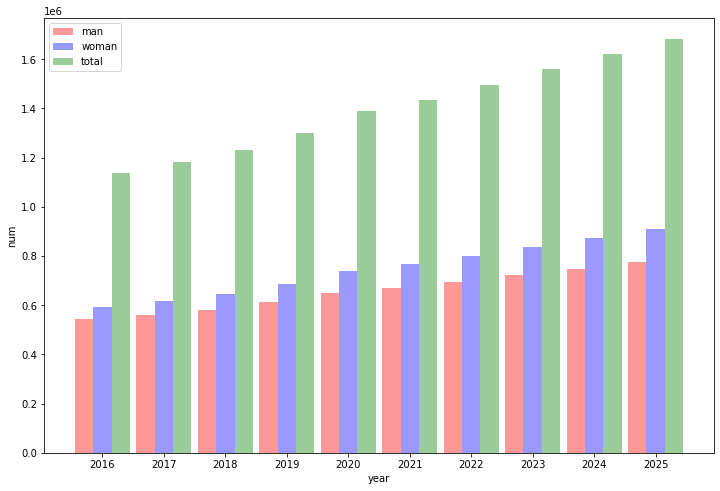

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,8))
bar_width = 0.3

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(10)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, population_predict['남자'], bar_width, alpha=0.4, color='red', label='man')

b2 = plt.bar(index + bar_width,population_predict['여자'], bar_width, alpha=0.4, color='blue', label='woman')

b3 = plt.bar(index + 2 * bar_width, population_predict['총'], bar_width, alpha=0.4, color='green', label='total')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭


plt.xticks(np.arange(bar_width, 10 + bar_width), population_predict.index)


# x축, y축 이름 및 범례 설정
plt.xlabel('year')
plt.ylabel('num')

plt.legend()
plt.show()

In [42]:
X = np.array(range(2016, 2021))
X = sm.add_constant(X)
X

array([[1.000e+00, 2.016e+03],
       [1.000e+00, 2.017e+03],
       [1.000e+00, 2.018e+03],
       [1.000e+00, 2.019e+03],
       [1.000e+00, 2.020e+03]])